In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Definición del problema

El presente proyecto se basa en la predicción de enfermedades (variable a predecir) en base a los síntomas de una serie de pacientes. Por tanto, enfrentamos un problema de clasificación multiclase (hallar la enfermedad del paciente entre una lista de diferentes posibles opciones).

Se utilizará para este cometido un total de 4 datasets, los cuales se pueden descargar en el siguiente enlace:

https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset?select=dataset.csv

- Dataset 1 - Symptom Severity

En este primer archivo nos encontramos con una relación de los posibles síntomas con la severidad o nivel de efectividad de éstos en el cuerpo durante los 2 primeros días.

- Dataset 2 - Symptom Description

En este archivo se describe cada una de las 41 posibles enfermedades.

- Dataset 3 - Symptom Precaution

Este tercer dataset contiene las pautas a seguir una vez se diagnostica cada una de las enfermedades.

- Dataset 4 - Dataset

Este es el archivo principal, el cual contiene todos los síntomas que lleva asociada cada una de las enfermedades, los cuales permitirán realizar el diagnóstico.

El **objetivo**, por tanto, será **predecir la enfermedad del paciente en base a sus síntomas y pautar el protocolo a seguir en base a dicha enfermedad**.

# Carga de datos

In [3]:
enfermedades = pd.read_csv("dataset.csv")

severidad = pd.read_csv("Symptom-severity.csv")

descripciones = pd.read_csv("symptom_Description.csv")

pautas = pd.read_csv("symptom_precaution.csv")

# EDA

## Estructura de los datos

In [4]:
enfermedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [5]:
enfermedades.head(3)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
severidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Symptom  133 non-null    object
 1   weight   133 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
severidad.head(3)

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4


In [8]:
descripciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 784.0+ bytes


In [9]:
descripciones.head(3)

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...


In [10]:
pautas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       41 non-null     object
 1   Precaution_1  41 non-null     object
 2   Precaution_2  41 non-null     object
 3   Precaution_3  40 non-null     object
 4   Precaution_4  40 non-null     object
dtypes: object(5)
memory usage: 1.7+ KB


In [11]:
pautas.head(3)

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching


## Estadísticos principales de severidad

In [12]:
severidad.describe()

,weight
count,133.000000
mean,4.225564
std,1.323543
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


## Cantidad de clases

In [13]:
len(enfermedades['Disease'].value_counts())

41

In [14]:
len(enfermedades['Symptom_1'].value_counts())

34

In [15]:
len(severidad['Symptom'].value_counts())

132

In [16]:
len(pautas['Precaution_1'].value_counts())

32

Existen 41 enfermedades distintas, 34 síntomas distintos, 132 síntomas distintos según severidad y 32 precauciones distintas.

Es necesario agrupar por algún tipo de patrón como modo de reducir las categorías que hay o podría complicarse con ello la obtención de variables dummy.

## Valores nulos

In [17]:
enfermedades.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [18]:
severidad.isnull().sum()

Symptom    0
weight     0
dtype: int64

In [19]:
descripciones.isnull().sum()

Disease        0
Description    0
dtype: int64

In [20]:
pautas.isnull().sum()

Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64

Los valores NaN se deben a personas que no presentan dichos síntomas, por tanto, dichos valores deberán ser rellenados como un 'No se presentan síntomas' o similar.

## Visualización de los datos

A continuación observamos los síntomas más comunes

In [21]:
enfermedades = enfermedades.fillna("Asintomatico")

In [22]:
for col in enfermedades.columns:
    enfermedades[col] = enfermedades[col].apply(lambda x : x[1:] if x[0] == " " else x)

    enfermedades[col] = enfermedades[col].apply(lambda x : x.split()[0] + x.split()[1] if " _" in x else x )
    
    enfermedades[col] = enfermedades[col].apply(lambda x : x.split()[0] + x.split()[1] if "_ " in x else x )

In [23]:
for col in enfermedades.columns:
    
        enfermedades[col] = enfermedades[col].apply(lambda x : x.split()[0] + x.split()[1] if x == "foul_smell_of urine" else x )

In [24]:
sintomas = pd.unique(severidad["Symptom"])

cols = ["Disease"] + list(sintomas)

df = pd.DataFrame(columns=cols)

df["Disease"] = enfermedades["Disease"]

df

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df1 = df.copy()

for x in range(enfermedades.shape[0]):
    
    for y in range(enfermedades.shape[1] - 1):
        
        sintom = enfermedades.iloc[x][y+1] # y+1 porque la primera columna es "Disease"
        
        if sintom != "Asintomatico":
            df1.iloc[x][sintom] = 1
        
df1

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,Fungal infection,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,1,1,1,1,NaN,NaN,NaN,NaN


In [26]:
df1 = df1.fillna(0)

In [27]:
categorias = df1.drop('Disease', axis = 1).columns

categorias

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=132)

In [28]:
valores = []

for i in categorias:
    valor = df1[i].sum()
    valores.append(valor)
    
print(valores)

[678, 786, 108, 222, 108, 798, 684, 222, 222, 108, 108, 1914, 216, 108, 1932, 114, 114, 114, 228, 456, 228, 456, 108, 114, 564, 1362, 108, 450, 678, 108, 222, 1134, 912, 570, 1146, 1152, 120, 228, 228, 1032, 564, 354, 114, 816, 114, 114, 114, 348, 702, 342, 354, 120, 120, 120, 120, 120, 696, 108, 234, 114, 114, 114, 114, 228, 336, 114, 114, 228, 114, 108, 114, 120, 120, 120, 462, 108, 114, 120, 114, 114, 234, 228, 228, 114, 108, 342, 114, 108, 120, 114, 102, 114, 114, 114, 114, 234, 474, 474, 114, 234, 114, 240, 108, 108, 120, 120, 228, 114, 120, 114, 114, 120, 120, 120, 120, 114, 114, 120, 114, 120, 228, 108, 108, 108, 114, 114, 114, 114, 114, 114, 114, 0]


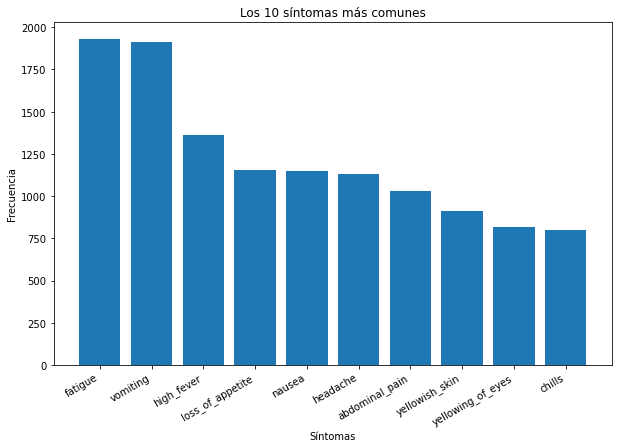

In [29]:
plt.figure(figsize = (10, 7))

valores, categorias = zip(*sorted(zip(valores, categorias), reverse=True))

plt.bar(categorias[:10], valores[:10])

plt.title('Los 10 síntomas más comunes')

plt.xlabel('Síntomas')

plt.ylabel('Frecuencia')

plt.gcf().autofmt_xdate()

plt.show()

In [30]:
df1['Disease'].value_counts()[0]

120

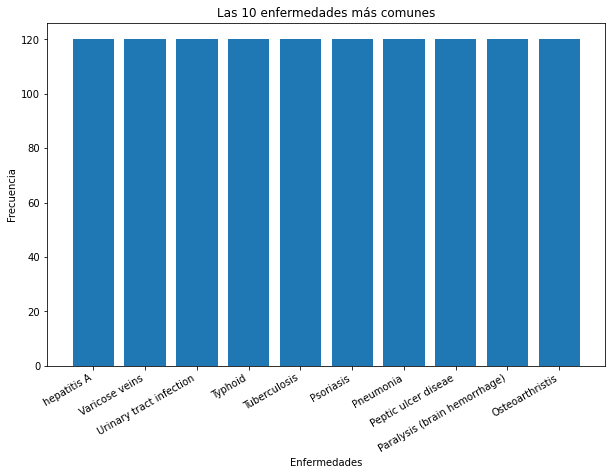

In [31]:
# 10 enfermades más comunes

categorias = list(df1.get('Disease'))

categorias = set(categorias)

categorias = list(categorias)

valores = [df['Disease'].value_counts()[i] for i in range(len(df1['Disease'].value_counts()))]

plt.figure(figsize = (10, 7))

valores, categorias = zip(*sorted(zip(valores, categorias), reverse=True))

plt.bar(categorias[:10], valores[:10])

plt.title('Las 10 enfermedades más comunes')

plt.xlabel('Enfermedades')

plt.ylabel('Frecuencia')

plt.gcf().autofmt_xdate()

plt.show()

# Guardar

In [32]:
from pickle import dump

dump(df1, open('DataFrame limpio.pkl', 'wb'))